# Huber Loss hyperparameter and class

> In this post, we'll extend our previous Huber loss function and show how you can include hyperparameters in defining loss functions. We'll also look at how to implement a custom loss as an object by inheriting the [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses/Loss) class. This is the summary of lecture "Custom Models, Layers and Loss functions with Tensorflow" from DeepLearning.AI.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Tensorflow, DeepLearining.AI]
- image: 

## Packages

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Prepare the Data

As before, this model will be trained on the `xs` and `ys` below where the relationship is $y = 2x-1$. Thus, later, when we test for `x=10`, whichever version of the model gets the closest answer to `19` will be deemed more accurate.

In [2]:
# inputs
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)

# labels
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

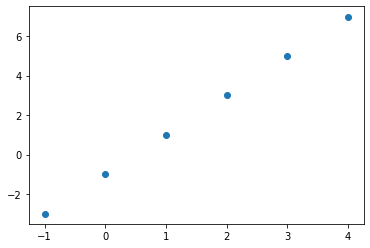

In [3]:
plt.scatter(xs, ys);

## Custom loss with hyperparameter

The `loss` argument in `model.compile()` only accepts functions that accepts two parameters: the ground truth (`y_true`) and the model predictions (`y_pred`). If we want to include a hyperparameter that we can tune, then we can define a wrapper function that accepts this hyperparameter.

In [4]:
# wrapper function that accepts the hyperparamter
def my_huber_loss_with_threshold(threshold):
    # function that accepts the ground truth and predictions
    def my_huber_loss(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= threshold
        small_error_loss = tf.square(error) / 2
        big_error_loss = threshold * (tf.abs(error) - (threshold / 2))
        return tf.where(is_small_error, small_error_loss, big_error_loss)
    
    # return the inner function tuned by the hyperparameter
    return my_huber_loss

We can now specify the `loss` as the wrapper function above. Notice that we can now set the `threshold` value. Try varying this value and see the results you get.

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1,])
])

model.compile(optimizer='sgd', loss=my_huber_loss_with_threshold(threshold=1.2))
model.fit(xs, ys, epochs=500, verbose=0)

In [6]:
model.predict([10.0])

array([[18.604269]], dtype=float32)

## Implement Custom Loss as a Class

We can also implement our custom loss as a class. It inherits from the Keras Loss class and the syntax and required methods are shown below.

In [7]:
from tensorflow.keras.losses import Loss

class MyHuberLoss(Loss):
    # Initialize instance attributes
    def __init__(self, threshold=1):
        super().__init__()
        self.threshold = threshold
        
    # Compute Loss
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= self.threshold
        small_error_loss = tf.square(error) / 2
        big_error_loss = self.threshold * (tf.abs(error) - self.threshold / 2)
        return tf.where(is_small_error, small_error_loss, big_error_loss)

You can specify the loss by instantiating an object from your custom loss class.

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1,])
])

model.compile(optimizer='sgd', loss=MyHuberLoss(threshold=1.02))
model.fit(xs, ys, epochs=500, verbose=0)

In [9]:
model.predict([10.0])

array([[18.334595]], dtype=float32)